Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/elasticity_2025/dt/s-1213-d-112-m-3-5-c-1-e-271817/Result_T-s-1213-d-112-m-3-5-c-1-e-271817.csv


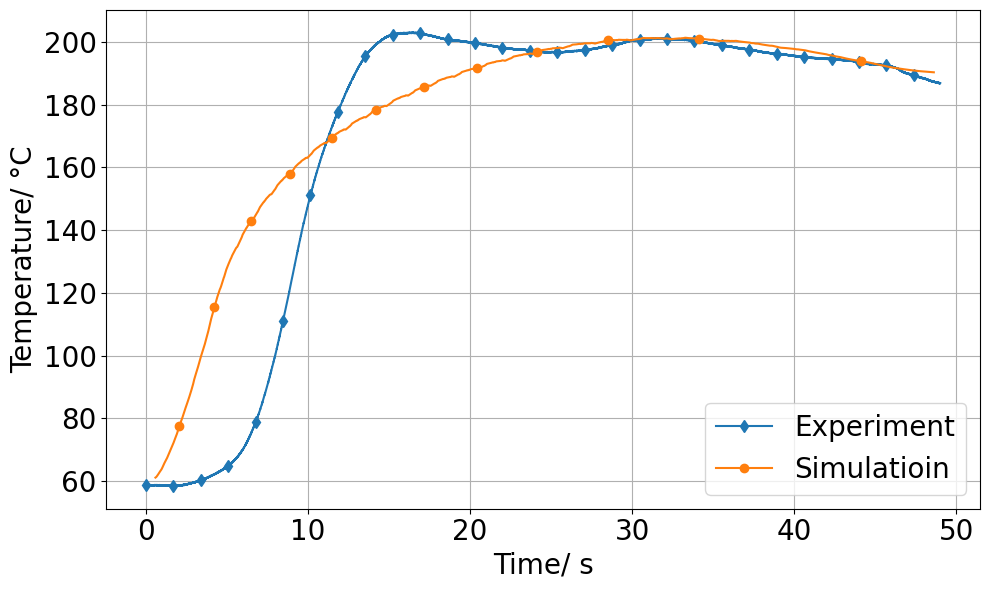

In [4]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/home/yanjun/documents/fenicsx/mech_disc/main_simulation/')
from disc_f import *
csv_file= '/home/yanjun/documents/sim_results/elasticity_2025/dt/s-1213-d-112-m-3-5-c-1-e-271817/Result_T-s-1213-d-112-m-3-5-c-1-e-271817.csv'


type1 = 'mesh_size'


plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
t_e = np.linspace (0, 49, len(T_e_ave) )
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<','d' ] 


labels= 'Simulatioin'
k = 0

lables = find_3_coord(  extract_mesh_labels(csv_file)  )
t,T = read_t_T ( csv_file )
time_s = round( 49/ extract_file_labels(csv_file, type1), 2)
    #calculate average temperature
T_3_ave = []
for i in range(len(T)):
    T_3_all =  T[i][ lables[0] ] + T[i][ lables[1] ] + T[i][ lables[2] ]   
    T_3_ave.append ( T_3_all / 3 )
plt.plot(t,pd.Series(T_3_ave).rolling(window=30).mean(),label= labels, marker=marker_styles[j], markevery=100)


fontsize_global = 20


plt.xticks(fontsize=fontsize_global)
plt.yticks(fontsize=fontsize_global)
plt.xlabel('Time/ s', fontsize=fontsize_global)
plt.ylabel('Temperature/ °C', fontsize=fontsize_global)
#plt.title('Simulation and Experimental results', fontsize=fontsize_global)
plt.legend(fontsize=fontsize_global)
plt.grid(True)
plt.tight_layout()
plt.savefig('T_sim_exe.png')
plt.show()
